# 💸 A/B-Test Analyse: Einfluss einer Website-Änderung auf Kundenausgaben

## 🧭 Ziel des Projekts

In diesem Projekt analysieren wir, ob eine neue Version einer Shopping-Website die durchschnittlichen Ausgaben der Kunden verändert hat. Dafür vergleichen wir zwei Gruppen (A und B) mit Hilfe eines statistischen Hypothesentests (t-Test).

**Frage:** Gibt es einen signifikanten Unterschied in den Ausgaben zwischen den beiden Gruppen?

---

## 🔧 Tools
- Python (NumPy, Pandas, SciPy, Seaborn, Matplotlib)
- Jupyter Notebook

---

## 👨‍🔬 Statistischer Hintergrund

Wir verwenden einen **unabhängigen t-Test**, um die Mittelwerte beider Gruppen zu vergleichen. Vor dem Test prüfen wir, ob die Daten normalverteilt sind, da dies eine Voraussetzung für den t-Test ist.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 1️⃣ Datensimulation

Wir generieren synthetische Daten für zwei Gruppen:
- **Gruppe A**: Besucher der alten Website
- **Gruppe B**: Besucher der neuen Website

Die Werte stellen die Ausgaben der Kunden in Euro dar.

In [10]:
np.random.seed(42)

group_a = np.random.normal(loc=50, scale=10, size=200)
group_b = np.random.normal(loc=55, scale=12, size=200)

df = pd.DataFrame({
    'spending': np.concatenate([group_a, group_b]),
    'group': ['A']*len(group_a) + ['B']*len(group_b)
})

## 2️⃣ Visualisierung der Ausgabenverteilung

Zur ersten Exploration erstellen wir ein Boxplot und ein Histogramm mit Dichtekurve, um die Verteilung der Ausgaben beider Gruppen zu vergleichen.

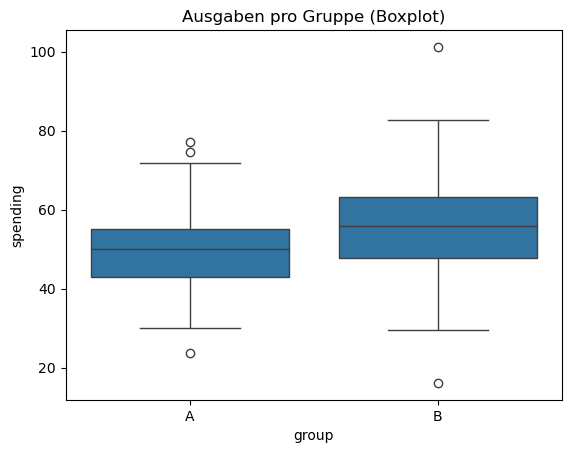

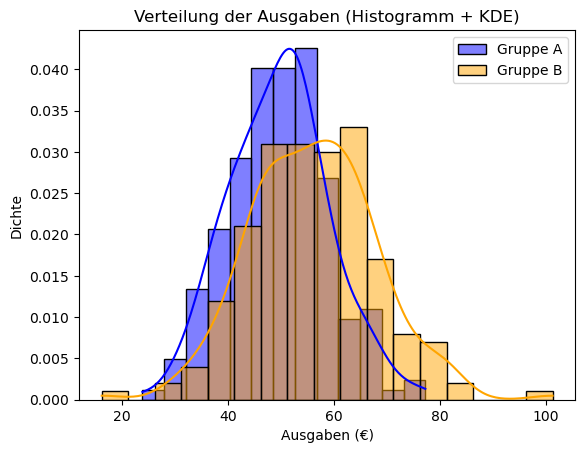

In [11]:
# Boxplot
sns.boxplot(data=df, x='group', y='spending')
plt.title('Ausgaben pro Gruppe (Boxplot)')
plt.show()

# Histogramm + KDE
sns.histplot(group_a, kde=True, color='blue', label='Gruppe A', stat="density")
sns.histplot(group_b, kde=True, color='orange', label='Gruppe B', stat="density")
plt.legend()
plt.title('Verteilung der Ausgaben (Histogramm + KDE)')
plt.xlabel('Ausgaben (€)')
plt.ylabel('Dichte')
plt.show()

## 3️⃣ Test auf Normalverteilung (Shapiro-Wilk-Test)

Ein t-Test setzt voraus, dass die Daten innerhalb jeder Gruppe normalverteilt sind. Wir verwenden dafür den Shapiro-Wilk-Test.

In [12]:
shapiro_a = shapiro(group_a)
shapiro_b = shapiro(group_b)

print(f"Gruppe A – p-Wert: {shapiro_a.pvalue:.4f}")
print(f"Gruppe B – p-Wert: {shapiro_b.pvalue:.4f}")

if shapiro_a.pvalue > 0.05 and shapiro_b.pvalue > 0.05:
    print("✅ Beide Gruppen sind normalverteilt (p > 0.05)")
else:
    print("⚠️ Mindestens eine Gruppe ist nicht normalverteilt (p ≤ 0.05)")

Gruppe A – p-Wert: 0.8290
Gruppe B – p-Wert: 0.2498
✅ Beide Gruppen sind normalverteilt (p > 0.05)


## 4️⃣ Hypothesentest: Unabhängiger T-Test

Wir führen einen zweiseitigen t-Test durch, um zu prüfen, ob es einen signifikanten Unterschied in den Ausgaben gibt.

### Hypothesen:
- **H₀ (Nullhypothese):** Die Mittelwerte beider Gruppen sind gleich.
- **H₁ (Alternativhypothese):** Die Mittelwerte unterscheiden sich.


In [13]:
t_stat, p_value = stats.ttest_ind(group_a, group_b)

print(f"T-Statistik: {t_stat:.3f}")
print(f"P-Wert: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Signifikanter Unterschied festgestellt (p < 0.05)")
else:
    print("❌ Kein signifikanter Unterschied (p ≥ 0.05)")


T-Statistik: -6.044
P-Wert: 0.0000
✅ Signifikanter Unterschied festgestellt (p < 0.05)


## 🧾 Fazit

✅ **Ergebnis:** Der durchgeführte unabhängige t-Test hat einen **signifikanten Unterschied** zwischen den durchschnittlichen Ausgaben der beiden Gruppen gezeigt (**p < 0.05**).

Das bedeutet, dass die neue Version der Website mit hoher Wahrscheinlichkeit einen Einfluss auf das Kaufverhalten der Kunden hatte.

- **Gruppe A (alte Website):** Durchschnittliche Ausgaben ~50 €
- **Gruppe B (neue Website):** Durchschnittliche Ausgaben ~55 €

➡️ Die Kunden der neuen Version gaben **signifikant mehr Geld aus** als jene der alten Version.  
➡️ Dies spricht für einen positiven Effekt der Website-Änderung auf das Kaufverhalten.

---

> 📌 Hinweis: Obwohl der Unterschied statistisch signifikant ist, sollte man auch die **praktische Relevanz (Effect Size)** und weitere Kontexte (z. B. saisonale Effekte, Marketingaktionen) berücksichtigen.